<a href="https://colab.research.google.com/github/roycanchica79/skills-introduction-to-github/blob/dependabot%2Fgithub_actions%2Factions%2Fcheckout-4/Estad%C3%ADsticas_Descriptiva_e_Inferenciales_(ROY)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LIBRERIAS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Cargar el archivo CSV

In [ ]:
data = pd.read_csv('Marketing_Data.csv')

# Seleccionar solo las columnas numéricas

In [ ]:
numerical_columns = data.select_dtypes(include=[np.number])

# Parámetros de dispersión

In [ ]:
dispersion_metrics = {
    'Varianza': numerical_columns.var(),
    'Desviación Estándar': numerical_columns.std(),
    'Rango': numerical_columns.max() - numerical_columns.min(),
    'Coeficiente de Variación': numerical_columns.std() / numerical_columns.mean()
}

# Mostrar parámetros de dispersión

In [ ]:
print(pd.DataFrame(dispersion_metrics))

              Varianza  Desviación Estándar  Rango  Coeficiente de Variación
TV        29483.799573           171.708473  591.4                  0.583874
Internet    881.710971            29.693618   99.2                  0.638188
Mailing    1897.233303            43.557242  227.4                  0.712791
Members     108.887412            10.434913   50.8                  0.372077


# Tabla de frecuencia para la columna 'Region'

In [ ]:
frequency_table = data['Region'].value_counts()
print(frequency_table)

Region
Central    59
South      51
West       46
East       44
Name: count, dtype: int64


# Crear histogramas y diagramas de caja
# Histogramas

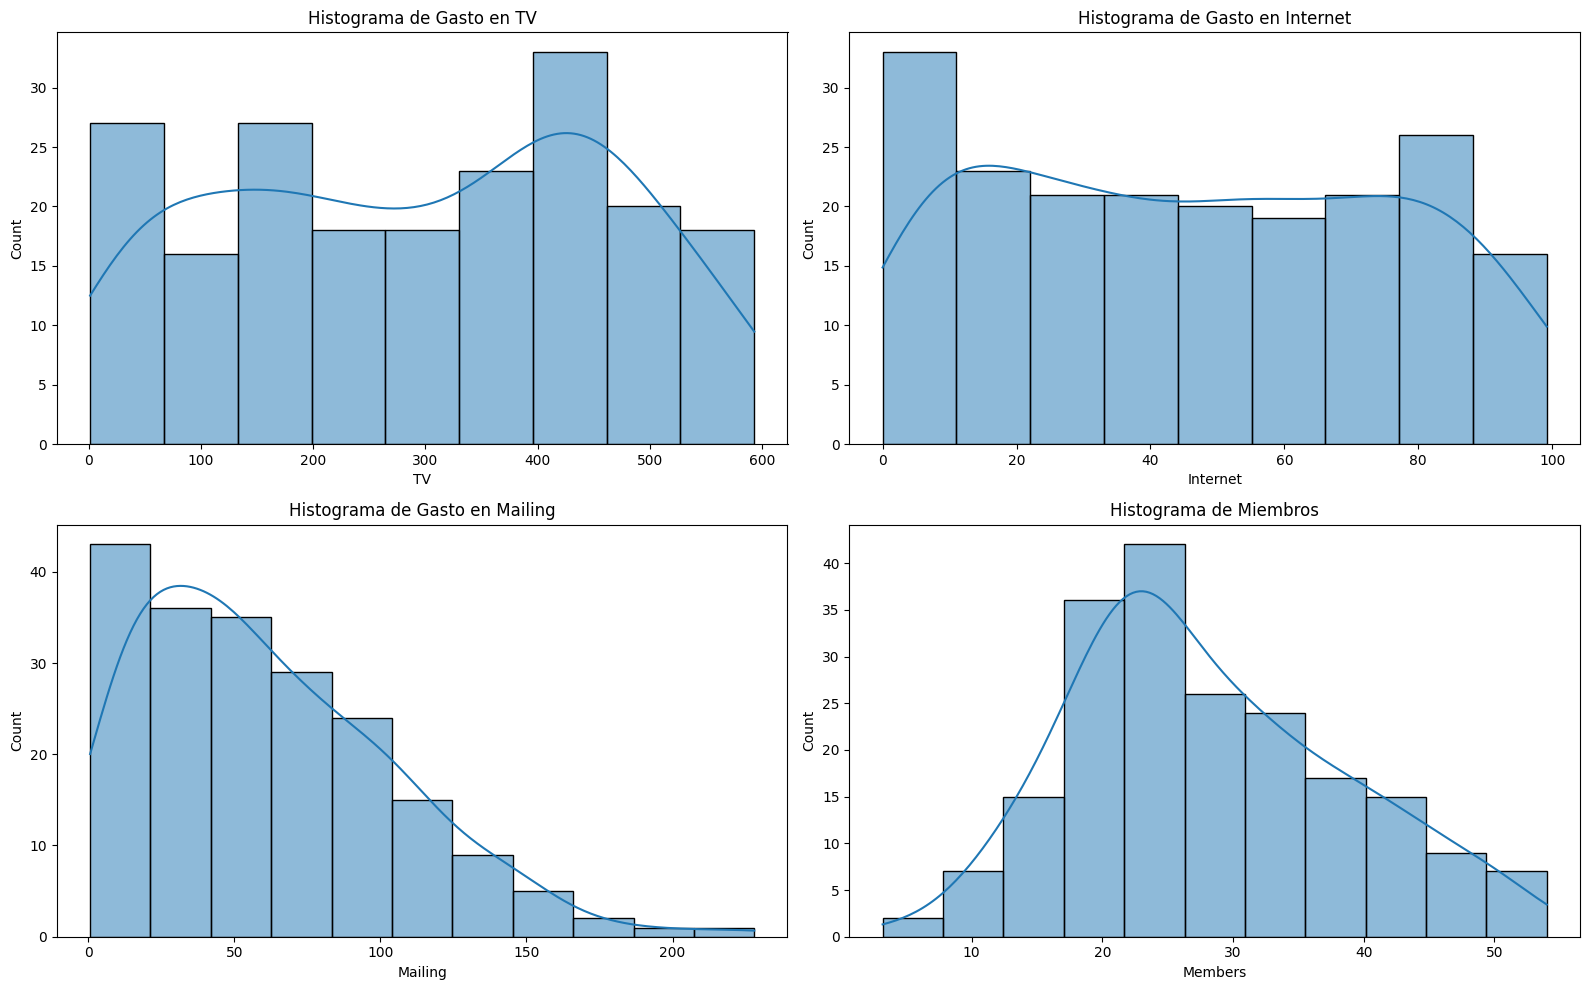

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['TV'], kde=True)
plt.title('Histograma de Gasto en TV')

plt.subplot(2, 2, 2)
sns.histplot(data['Internet'], kde=True)
plt.title('Histograma de Gasto en Internet')

plt.subplot(2, 2, 3)
sns.histplot(data['Mailing'], kde=True)
plt.title('Histograma de Gasto en Mailing')

plt.subplot(2, 2, 4)
sns.histplot(data['Members'], kde=True)
plt.title('Histograma de Miembros')

plt.tight_layout()
plt.show()

# Diagramas de caja

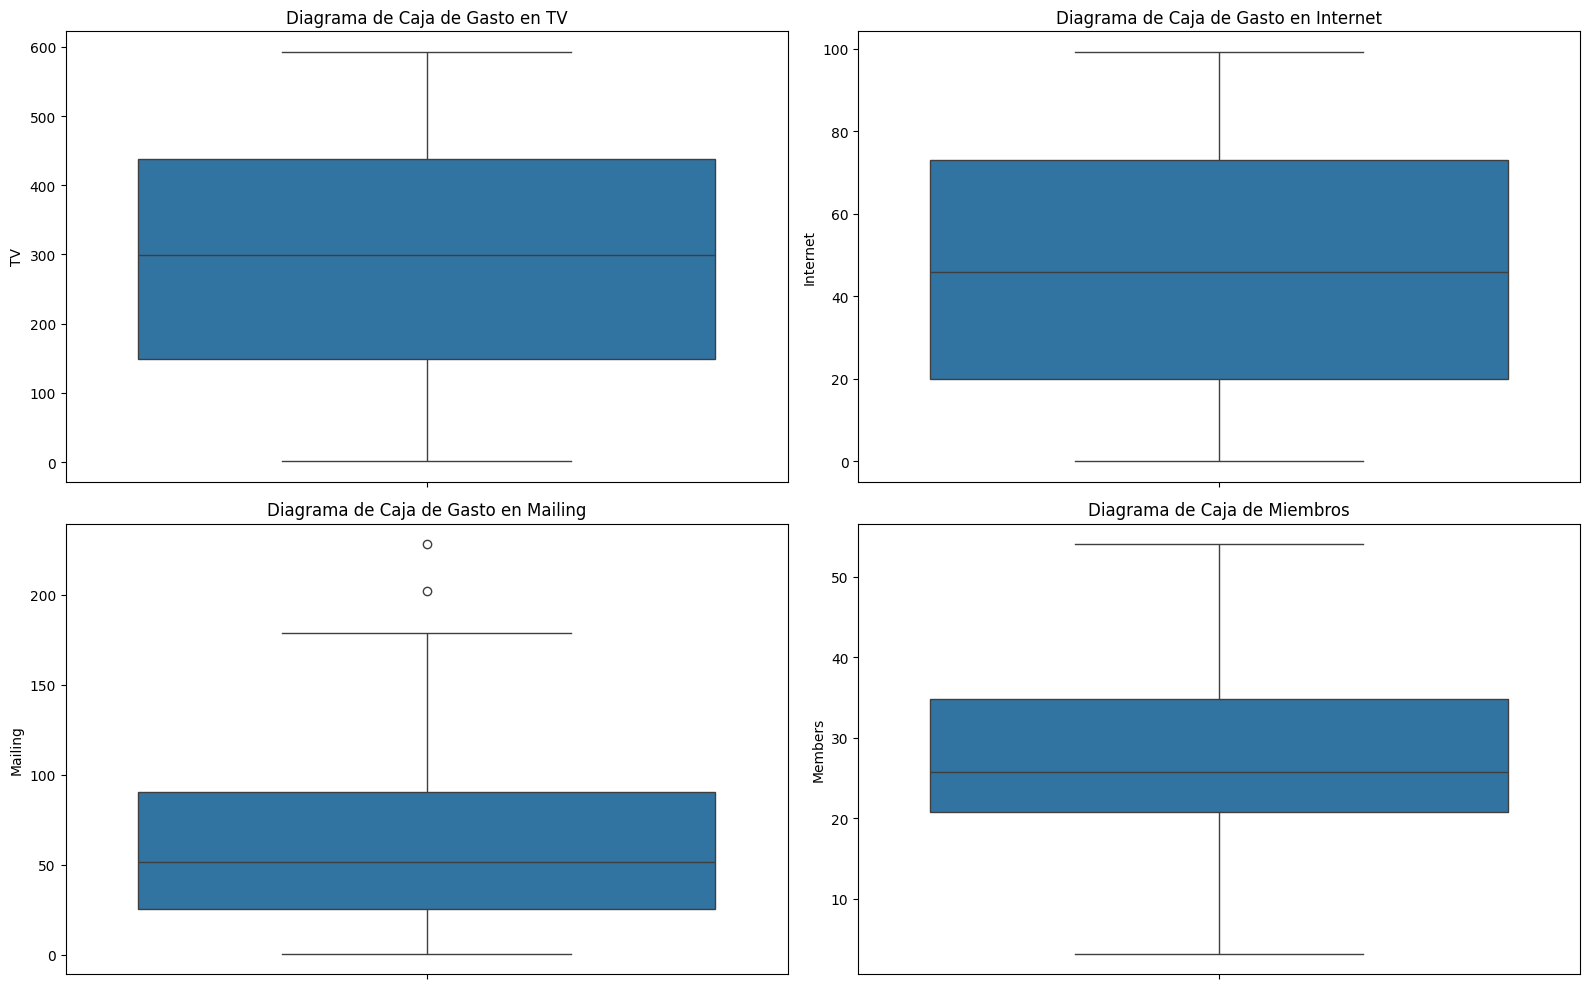

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=data['TV'])
plt.title('Diagrama de Caja de Gasto en TV')

plt.subplot(2, 2, 2)
sns.boxplot(y=data['Internet'])
plt.title('Diagrama de Caja de Gasto en Internet')

plt.subplot(2, 2, 3)
sns.boxplot(y=data['Mailing'])
plt.title('Diagrama de Caja de Gasto en Mailing')

plt.subplot(2, 2, 4)
sns.boxplot(y=data['Members'])
plt.title('Diagrama de Caja de Miembros')

plt.tight_layout()
plt.show()

#  Estadísticas Inferenciales
# Prueba de hipótesis: Comparar el gasto medio en TV entre dos regiones

In [ ]:
region1 = data[data['Region'] == 'Central']['TV']
region2 = data[data['Region'] == 'South']['TV']
t_stat, p_value = stats.ttest_ind(region1, region2)

print(f"Prueba de hipótesis: t-stat = {t_stat}, p-value = {p_value}")

Prueba de hipótesis: t-stat = -0.24772327275142553, p-value = 0.8048188846914978


# Intervalo de confianza para el gasto en Internet

In [ ]:
mean_internet = data['Internet'].mean()
std_internet = data['Internet'].std()
confidence_interval = stats.norm.interval(0.95, loc=mean_internet, scale=std_internet/np.sqrt(len(data['Internet'])))

print(f"Intervalo de confianza para el gasto en Internet: {confidence_interval}")

Intervalo de confianza para el gasto en Internet: (42.412750076671585, 50.64324992332844)


# Tablas de Contingencia y Tabulaciones Cruzadas
# Tabla de contingencia entre 'Region' y los cuartiles de 'TV'

In [ ]:
data['TV_Cuartiles'] = pd.qcut(data['TV'], 4, labels=False)
contingency_table = pd.crosstab(data['Region'], data['TV_Cuartiles'])
print(contingency_table)

TV_Cuartiles   0   1   2   3
Region                      
Central       15  10  18  16
East          12  12  10  10
South         12  14  11  14
West          11  14  11  10


# Tabulación cruzada entre 'Region' y 'Mailing'

In [ ]:
cross_tab = pd.crosstab(data['Region'], pd.qcut(data['Mailing'], 4))
print(cross_tab)

Mailing  (0.599, 25.5]  (25.5, 51.5]  (51.5, 90.2]  (90.2, 228.0]
Region                                                           
Central             16            14            10             19
East                10             8            13             13
South               15            15            12              9
West                 9            13            16              8
